**Applying steric height change to Argo profiles**

Get temperature, salinity, pressure, latitude, longitude and time from netCDF Argo file

In [1]:
import stericheight as sth
from gsw import *
import gsw.conversions
import matplotlib.pyplot as plt
%matplotlib inline

data = '1900022_prof.nc'
T,S,P,lat,long,time = sth.readnc(data)

Convert pressure to depth

In [2]:
depth = np.zeros([len(P),P.shape[1]])
for i in range(len(P)):
    depth[i,:] = gsw.z_from_p(P[i,:],lat[i])

Compute steric height change

In [3]:
# dh... matlab 
# dh2... python
dh = np.zeros(len(lat))
dh2 = np.zeros(len(lat))
for i in range(len(depth)):
    dh[i] = sth.TSz_to_h_steric(T[i,:], S[i,:], depth[i,:], lat[i], long[i])
    dh2[i] = sth.TSz_to_h_steric2(T[i,:], S[i,:], depth[i,:], lat[i], long[i])

# compute difference (python vs. matlab)
diff = dh-dh2
print("diff_max = ", max(abs(diff))* 10**3, "[mm]")

diff_max =  2.9563008025474957 [mm]


Time series plot

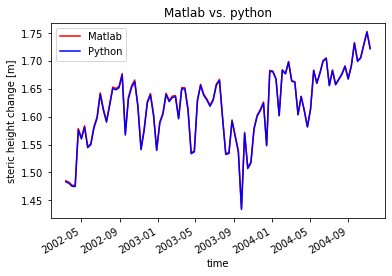

In [4]:
plt.plot(time, dh, 'r')
plt.plot(time, dh2, 'b')
plt.ylabel('steric height change [m]')
plt.xlabel('time')
plt.title('Matlab vs. python')
plt.legend(['Matlab','Python'])
plt.gcf().autofmt_xdate()

plt.show()

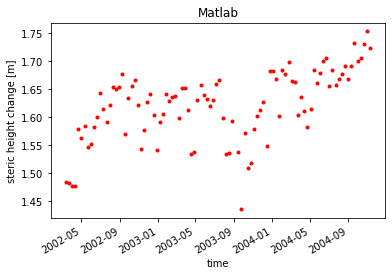

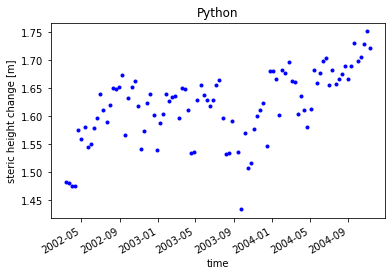

In [5]:
plt.figure()
plt.title('Matlab')
plt.xlabel('time')
plt.ylabel('steric height change [m]')
plt.xlabel('time')
plt.plot(time,dh, 'r.')
plt.gcf().autofmt_xdate()
plt.show()

plt.figure()
plt.title('Python')
plt.ylabel('steric height change [m]')
plt.xlabel('time')
plt.plot(time,dh2, 'b.')
plt.gcf().autofmt_xdate()
plt.show()

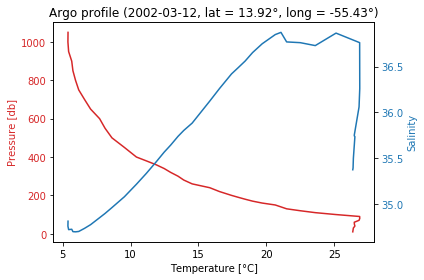

In [6]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Temperature [°C]')
ax1.set_ylabel('Pressure [db]', color=color)
ax1.plot(T[0,:],P[0,:], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Salinity', color=color)  
ax2.plot(T[0,:],S[0,:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Argo profile ('+str(time[0]).split(' ')[0]+', lat = '+str(round(lat[0],2))+'°'+', long = '+str(round(long[0],2))+'°)')

fig.tight_layout()
plt.show()